## 1. Import modules

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import os
os.chdir('/data/home/sjhan/data/2-Datamining/data/')

## 2. Get Association Rules with 'training set'

In [ ]:
# iit = itemset_item_training
iit = pd.read_csv("itemset_item_training.csv",names = ['itemsets','item'])

In [ ]:
# count the number of incidents of each item in itemsets
df_table = pd.read_csv("itemset_item_training.csv",names = ['itemsets','item'])
df_table["incident_count"] = 1
df_table = df_table.groupby("item").sum().sort_values("incident_count", ascending=True).reset_index()
df_table = df_table[['item','incident_count']]

count    42563.000000
mean         2.016352
std          4.497123
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        285.000000
Name: incident_count, dtype: float64

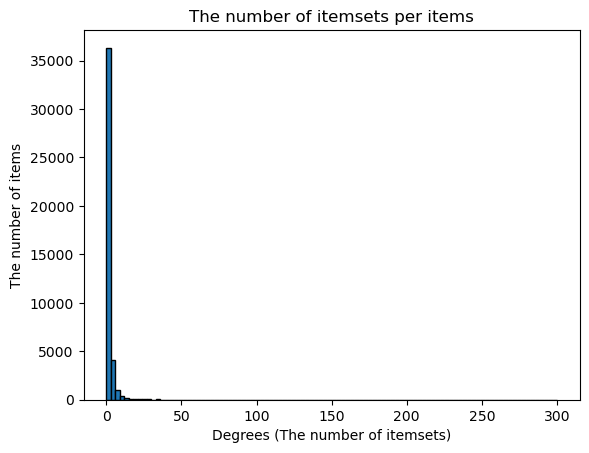

In [ ]:
analysis = df_table['incident_count']
plt.hist(analysis,range=[0,300],edgecolor='black',bins=100)
# Set labels and title
plt.xlabel('Degrees (The number of itemsets)')
plt.ylabel('The number of items')
plt.title('The number of itemsets per items')

analysis.describe()

In [ ]:
# remove the items with incident count 1 to save the memory
merged_df = pd.merge(iit,df_table)
merged_df = merged_df.sort_values("incident_count", ascending=False)
removed_df = merged_df[(merged_df['incident_count']!=1)] #& (merged_df['incident_count']!=2)]
removed_df

In [ ]:
# group items by same itemset
grouped_df=removed_df.drop('incident_count', axis=1).groupby('itemsets').agg(list)

# Reset index to convert col from an index to a regular column
grouped_df = grouped_df.reset_index()

# Concatenate col values into a single string column
grouped_df['item'] = grouped_df['item'].apply(lambda x: ' '.join(map(str, x)))
print(grouped_df)

data = list(grouped_df["item"].apply(lambda x:x.split(" ") ))
data

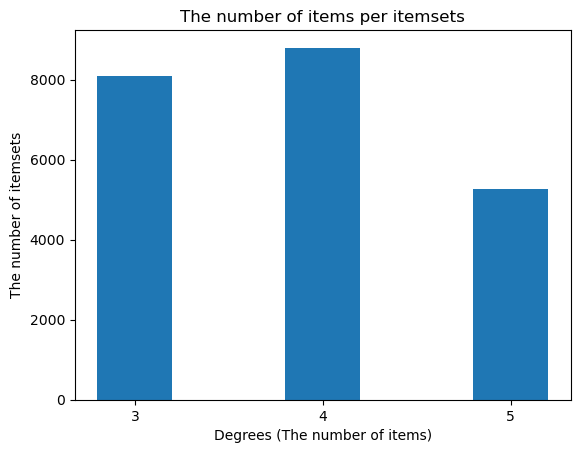

In [ ]:
item_list = merged_df.drop('incident_count', axis=1).groupby('itemsets').agg(list).reset_index()
item_len = item_list.item.apply(len)
item_len.describe()

# Count the occurrences of each value
value_counts = item_len.value_counts()

# Get the unique values and their counts
unique_values = value_counts.index
counts = value_counts.values

# Plot the bar plot
plt.bar(unique_values, counts, width = 0.4)

# Set labels and title
plt.xlabel('Degrees (The number of items)')
plt.ylabel('The number of itemsets')
plt.title('The number of items per itemsets')

# Set the x-axis tick labels
plt.xticks(unique_values)

# Display the plot
plt.show()

In [ ]:
#Let's transform the list, with one-hot encoding
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data).transform(data,sparse=True)
df = pd.DataFrame.sparse.from_spmatrix(a_data,columns=a.columns_)
df

0  1  10  1000  10001  10004  1001  10011  10014  10017  ...  9958  \
0      0  0   0     0      0      0     0      0      0      0  ...     0   
1      0  0   0     0      0      0     0      0      0      0  ...     0   
2      0  0   0     0      0      0     0      0      0      0  ...     0   
3      0  0   0     0      0      0     0      0      0      0  ...     0   
4      0  0   0     0      0      0     0      0      0      0  ...     0   
...   .. ..  ..   ...    ...    ...   ...    ...    ...    ...  ...   ...   
21122  0  0   0     0      0      0     0      0      0      0  ...     0   
21123  0  0   0     0      0      0     0      0      0      0  ...     0   
21124  0  0   0     0      0      0     0      0      0      0  ...     0   
21125  0  0   0     0      0      0     0      0      0      0  ...     0   
21126  0  0   0     0      0      0     0      0      0      0  ...     0   

       9961  9966  9973  9979  9980  9987  9992  9995  9998  
0         0     0     0     0     0     0     0     0     0  
1         0     0     0     0     0     0     0     0     0  
2         0     0     0     0     0     0     0     0     0  
3         0     0     0     0     0     0     0     0     0  
4         0     0     0     0     0     0     0     0     0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
21122     0     0     0     0     0     0     0     0     0  
21123     0     0     0     0     0     0     0     0     0  
21124     0     0     0     0     0     0     0     0     0  
21125     0     0     0     0     0     0     0     0     0  
21126     0     0     0     0     0     0     0     0     0  

[21127 rows x 12201 columns]

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
#set a threshold value for the support value and calculate the support value.
ap_df = apriori(df,min_support = 0.00001, use_colnames = True, low_memory = True, verbose = 1)
ap_df

Processing 4134 combinations | Sampling itemset size 543


support                             itemsets
0       0.001325                                  (0)
1       0.000095                                  (1)
2       0.000095                                 (10)
3       0.000142                               (1000)
4       0.000095                              (10001)
...          ...                                  ...
101911  0.000047    (9092, 7453, 40211, 33847, 36867)
101912  0.000047  (40884, 38949, 35044, 39392, 34780)
101913  0.000047   (7831, 35488, 42056, 39799, 38873)
101914  0.000047     (36680, 8121, 42035, 9698, 7013)
101915  0.000047     (38257, 38143, 4191, 6693, 5717)

[101916 rows x 2 columns]

In [ ]:
ap_df[ap_df.itemsets.apply(lambda x : len(list(x))) > 1]

support                             itemsets
12201   0.000047                           (10156, 0)
12202   0.000047                           (10963, 0)
12203   0.000047                           (11619, 0)
12204   0.000047                           (13076, 0)
12205   0.000047                           (13143, 0)
...          ...                                  ...
101911  0.000047    (9092, 7453, 40211, 33847, 36867)
101912  0.000047  (40884, 38949, 35044, 39392, 34780)
101913  0.000047   (7831, 35488, 42056, 39799, 38873)
101914  0.000047     (36680, 8121, 42035, 9698, 7013)
101915  0.000047     (38257, 38143, 4191, 6693, 5717)

[89715 rows x 2 columns]

In [ ]:
#Let's view our interpretation values using the Associan rule function.
df_ar = association_rules(ap_df, metric = "confidence", min_threshold = 0.00005)
df_ar

antecedents                 consequents  antecedent support  \
0          (10156)                         (0)            0.000095   
1              (0)                     (10156)            0.001325   
2          (10963)                         (0)            0.000426   
3              (0)                     (10963)            0.001325   
4          (11619)                         (0)            0.000473   
...            ...                         ...                 ...   
395765     (38257)   (5717, 38143, 4191, 6693)            0.000426   
395766     (38143)   (38257, 5717, 4191, 6693)            0.000142   
395767      (4191)  (5717, 38257, 38143, 6693)            0.004260   
395768      (6693)  (5717, 38257, 38143, 4191)            0.000142   
395769      (5717)  (38257, 38143, 4191, 6693)            0.000568   

        consequent support   support  confidence         lift  leverage  \
0                 0.001325  0.000047    0.500000   377.267857  0.000047   
1                 0.000095  0.000047    0.035714   377.267857  0.000047   
2                 0.001325  0.000047    0.111111    83.837302  0.000047   
3                 0.000426  0.000047    0.035714    83.837302  0.000047   
4                 0.001325  0.000047    0.100000    75.453571  0.000047   
...                    ...       ...         ...          ...       ...   
395765            0.000047  0.000047    0.111111  2347.444444  0.000047   
395766            0.000047  0.000047    0.333333  7042.333333  0.000047   
395767            0.000047  0.000047    0.011111   234.744444  0.000047   
395768            0.000047  0.000047    0.333333  7042.333333  0.000047   
395769            0.000047  0.000047    0.083333  1760.583333  0.000047   

        conviction  zhangs_metric  
0         1.997349       0.997444  
1         1.036939       0.998673  
2         1.123509       0.988493  
3         1.036595       0.989383  
4         1.109639       0.987214  
...            ...            ...  
395765    1.124947       1.000000  
395766    1.499929       1.000000  
395767    1.011188       1.000000  
395768    1.499929       1.000000  
395769    1.090857       1.000000  

[395770 rows x 10 columns]

## 3. Get Association Rules with 'validation set'
#### same process with 2 but with different data set

In [ ]:
# iit = itemset_item_training
iit = pd.read_csv("itemset_item_valid_query.csv",names = ['itemsets','item'])
answer = pd.read_csv("itemset_item_valid_answer.csv",names = ['itemsets','item'])

# count the number of incidents of each item in itemsets
df_table = pd.read_csv("itemset_item_valid_query.csv",names = ['itemsets','item'])
df_table["incident_count"] = 1
df_table = df_table.groupby("item").sum().sort_values("incident_count", ascending=True).reset_index()
df_table = df_table[['item','incident_count']]
df_table.style.background_gradient(cmap='Greens')

In [ ]:
# remove the items with incident count 1
merged_df = pd.merge(iit,df_table)
sorted_df = merged_df.sort_values("incident_count", ascending=False)
removed_df = sorted_df[(sorted_df['incident_count']!=1)]
grouped_df= removed_df.drop('incident_count', axis=1).groupby('itemsets').agg(list)

# Reset index to convert col from an index to a regular column
grouped_df = grouped_df.reset_index()

# Concatenate col values into a single string column
grouped_df['item'] = grouped_df['item'].apply(lambda x: ' '.join(map(str, x)))

data = list(grouped_df["item"].apply(lambda x:x.split(" ") ))
data

[['35006', '32102', '29189', '19558'],
 ['22078', '28628', '29102'],
 ['10952'],
 ['37154'],
 ['4851'],
 ['35430', '30788'],
 ['22353'],
 ['14492', '21415'],
 ['23260', '13143'],
 ['40884', '8411'],
 ['27447', '13707', '24332', '2095'],
 ['42415'],
 ['8197', '31663'],
 ['42089', '1554'],
 ['5500', '37178'],
 ['13073'],
 ['17046'],
 ['21418', '18951'],
 ['4191', '19110', '28141'],
 ['13979', '30788'],
 ['14230'],
 ['9550', '39795'],
 ['30835', '19794'],
 ['28493', '23320', '33060', '41398'],
 ['1392', '35433'],
 ['8820'],
 ['1392'],
 ['28955', '19802', '41149'],
 ['13979', '1385'],
 ['8943', '6651'],
 ['38871', '29301'],
 ['32510', '23552', '18587'],
 ['6285'],
 ['28586', '16685'],
 ['231', '30085'],
 ['12648', '38515'],
 ['18616'],
 ['37599'],
 ['17652'],
 ['19802', '21983', '7598'],
 ['16926'],
 ['27761'],
 ['8487', '231'],
 ['18457'],
 ['16854'],
 ['30319', '33642'],
 ['12648'],
 ['26157'],
 ['3531', '37966'],
 ['706', '15224'],
 ['29169', '16606', '16601', '4'],
 ['25186', '37766', 

In [ ]:
#Let's transform the list, with one-hot encoding
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df

0  10051  10089  10121  10309  10343  10368  10375  10385  10419  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2328  False  False  False  False  False  False  False  False  False  False   
2329  False  False  False  False  False  False  False  False  False  False   
2330  False  False  False  False  False  False  False  False  False  False   
2331  False  False  False  False  False  False  False  False  False  False   
2332  False  False  False  False  False  False  False  False  False  False   

      ...   9628   9663   9664   9734   9780   9796   9812   9885   9933  \
0     ...  False  False  False  False  False  False  False  False  False   
1     ...  False  False  False  False  False  False  False  False  False   
2     ...  False  False  False  False  False  False  False  False  False   
3     ...  False  False  False  False  False  False  False  False  False   
4     ...  False  False  False  False  False  False  False  False  False   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2328  ...  False  False  False  False  False  False  False  False  False   
2329  ...  False  False  False  False  False  False  False  False  False   
2330  ...  False  False  False  False  False  False  False  False  False   
2331  ...  False  False  False  False  False  False  False  False  False   
2332  ...  False  False  False  False  False  False  False  False  False   

       9961  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
2328  False  
2329  False  
2330  False  
2331  False  
2332  False  

[2333 rows x 1249 columns]

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
#set a threshold value for the support value and calculate the support value.
val_ap_df = apriori(df,min_support = 0.0002, use_colnames = True, low_memory = True, verbose = 1)
val_ap_df

Processing 230 combinations | Sampling itemset size 4


support                      itemsets
0     0.000857                           (0)
1     0.003000                       (10051)
2     0.000857                       (10089)
3     0.001715                       (10121)
4     0.000857                       (10309)
...        ...                           ...
3945  0.000429   (29169, 34338, 8169, 35072)
3946  0.000429      (6711, 32199, 9574, 417)
3947  0.000429   (37355, 33280, 34114, 4232)
3948  0.000429    (4626, 6264, 41229, 34867)
3949  0.000429  (38939, 37752, 37015, 37704)

[3950 rows x 2 columns]

In [ ]:
val_ap_df[val_ap_df.itemsets.apply(lambda x : len(list(x))) > 1]

support                      itemsets
1249  0.000429                (10051, 10434)
1250  0.000429                (10051, 15765)
1251  0.000429                (10051, 21000)
1252  0.000429                (33189, 10089)
1253  0.000429                  (10089, 584)
...        ...                           ...
3945  0.000429   (29169, 34338, 8169, 35072)
3946  0.000429      (6711, 32199, 9574, 417)
3947  0.000429   (37355, 33280, 34114, 4232)
3948  0.000429    (4626, 6264, 41229, 34867)
3949  0.000429  (38939, 37752, 37015, 37704)

[2701 rows x 2 columns]

In [ ]:
#Let's view our interpretation values using the Associan rule function.
val_df_ar = association_rules(val_ap_df, metric = "confidence", min_threshold = 0.2)
val_df_ar

antecedents            consequents  antecedent support  \
0            (15765)                (10051)            0.001286   
1            (33189)                (10089)            0.000857   
2            (10089)                (33189)            0.000857   
3            (10089)                  (584)            0.000857   
4              (584)                (10089)            0.000857   
...              ...                    ...                 ...   
5802  (37752, 37704)         (38939, 37015)            0.000429   
5803  (37015, 37704)         (38939, 37752)            0.000429   
5804         (37752)  (38939, 37015, 37704)            0.001715   
5805         (37015)  (38939, 37752, 37704)            0.000857   
5806         (37704)  (38939, 37752, 37015)            0.000857   

      consequent support   support  confidence         lift  leverage  \
0               0.003000  0.000429    0.333333   111.095238  0.000425   
1               0.000857  0.000429    0.500000   583.250000  0.000428   
2               0.000857  0.000429    0.500000   583.250000  0.000428   
3               0.000857  0.000429    0.500000   583.250000  0.000428   
4               0.000857  0.000429    0.500000   583.250000  0.000428   
...                  ...       ...         ...          ...       ...   
5802            0.000429  0.000429    1.000000  2333.000000  0.000428   
5803            0.000429  0.000429    1.000000  2333.000000  0.000428   
5804            0.000429  0.000429    0.250000   583.250000  0.000428   
5805            0.000429  0.000429    0.500000  1166.500000  0.000428   
5806            0.000429  0.000429    0.500000  1166.500000  0.000428   

      conviction  zhangs_metric  
0       1.495499       0.992275  
1       1.998285       0.999142  
2       1.998285       0.999142  
3       1.998285       0.999142  
4       1.998285       0.999142  
...          ...            ...  
5802         inf       1.000000  
5803         inf       1.000000  
5804    1.332762       1.000000  
5805    1.999143       1.000000  
5806    1.999143       1.000000  

[5807 rows x 10 columns]

### 4. Get the recommended 100 items for each itemsets in 'validation set' according to the output association rules above. & Check the accuracy and rank

In [ ]:
import random
import itertools

itemsets = iit['itemsets'].unique()
itemsets_df = pd.DataFrame({'itemsets':itemsets})

item_list = sorted_df.drop('incident_count', axis=1).groupby('itemsets').agg(list).reset_index()
item_list['item']=item_list['item'].apply(lambda x: [str(item) for item in x])

query = pd.merge(itemsets_df,item_list)
query

merged_df = pd.concat([df_ar, val_df_ar], ignore_index=True)
#merged_df = merged_df.sort_values("lift", ascending=False, ignore_index=True)

merged_ant = merged_df['antecedents']
merged_cns = merged_df['consequents']

tot_ans = [] # total answer lists for itemsets

for _, row in query.iterrows():
    item = row['item']
    rec_ans = [] # recommended 100 items for each itemset

    for i in item:
        for a, c in zip(merged_ant, merged_cns):
            if len(rec_ans) == 100:
                break
            if str(i) in a:
                rec_ans.extend(list(c))
    rec_ans = list(np.unique(rec_ans))

    if len(rec_ans) > 100:
        rec_ans = rec_ans[0:100]

    # fill the rest with random items
    random_set = list(str(random.randrange(0, 42653)) for _ in range(100 - len(rec_ans)))

    rec_ans += random_set
    tot_ans.append(rec_ans)

# check the accuracy
ans_df = pd.DataFrame(list(zip(list(itemsets), tot_ans)), columns=['itemsets', 'recommended_items'])

correct = 0
rank = 0
for i in range(len(answer)):
    if str(answer['item'][i]) in ans_df['recommended_items'][i]:
        correct += 1
        rank += (ans_df['recommended_items'][i].index(str(answer['item'][i])) + 1)
    else:
        rank += 101

accuracy = correct/len(answer)
rank = rank/len(answer)

print(correct)
print(accuracy)
print(rank)

280
0.10111953773925605
93.78728782954136


### 5. Get the recommended 100 items for each itemsets in 'test set' using the same method applied for validation set.

In [ ]:
# iit = itemset_item_training
iit = pd.read_csv("itemset_item_test_query.csv",names = ['itemsets','item'])

# count the number of incidents of each item in itemsets
df_table = pd.read_csv("itemset_item_test_query.csv",names = ['itemsets','item'])
df_table["incident_count"] = 1
df_table = df_table.groupby("item").sum().sort_values("incident_count", ascending=True).reset_index()
df_table = df_table[['item','incident_count']]
df_table.style.background_gradient(cmap='Greens')

In [ ]:
# remove the items with incident count 1
merged_df = pd.merge(iit,df_table)
sorted_df = merged_df.sort_values("incident_count", ascending=False)
removed_df = sorted_df[(sorted_df['incident_count']!=1)]
grouped_df= removed_df.drop('incident_count', axis=1).groupby('itemsets').agg(list)

# Reset index to convert col from an index to a regular column
grouped_df = grouped_df.reset_index()

# Concatenate col values into a single string column
grouped_df['item'] = grouped_df['item'].apply(lambda x: ' '.join(map(str, x)))

data = list(grouped_df["item"].apply(lambda x:x.split(" ") ))
data

[['5306'],
 ['16800', '22483'],
 ['16941'],
 ['20422'],
 ['21135', '32229'],
 ['42056', '22883', '19840'],
 ['28955'],
 ['40204', '129'],
 ['8052', '23507', '18390'],
 ['26157'],
 ['39794'],
 ['5169'],
 ['9235', '36467'],
 ['32229'],
 ['21506', '37752', '31220', '23247'],
 ['20788', '18507'],
 ['21187'],
 ['31432', '15452', '16694'],
 ['20207'],
 ['8284'],
 ['6742', '37599'],
 ['37718'],
 ['28156', '6285', '18666'],
 ['21700', '27095'],
 ['21265', '784'],
 ['25194'],
 ['26324', '494', '38821'],
 ['38471'],
 ['16326'],
 ['37284'],
 ['24304'],
 ['20823'],
 ['14802', '5982'],
 ['31251'],
 ['30835', '11225', '19802'],
 ['28839', '42163'],
 ['24332', '14959'],
 ['24831', '35640'],
 ['8738'],
 ['33280', '25023'],
 ['38474'],
 ['37401'],
 ['10121', '34202'],
 ['25829'],
 ['33106', '39688'],
 ['37713', '19090', '38061', '152'],
 ['19896', '34860', '13605'],
 ['4938', '37272'],
 ['24086'],
 ['38737', '24867'],
 ['31432', '32246', '36879'],
 ['35089'],
 ['20560', '1704', '7979'],
 ['33485'],
 ['

In [ ]:
#Let's transform the list, with one-hot encoding
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df

0  10011  10051  10058  10110  10121  10264  10275  10280   1032  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2385  False  False  False  False  False  False  False  False  False  False   
2386  False  False  False  False  False  False  False  False  False  False   
2387  False  False  False  False  False  False  False  False  False  False   
2388  False  False  False  False  False  False  False  False  False  False   
2389  False  False  False  False  False  False  False  False  False  False   

      ...   9621   9628   9698   9734   9774   9796   9821   9914   9937  \
0     ...  False  False  False  False  False  False  False  False  False   
1     ...  False  False  False  False  False  False  False  False  False   
2     ...  False  False  False  False  False  False  False  False  False   
3     ...  False  False  False  False  False  False  False  False  False   
4     ...  False  False  False  False  False  False  False  False  False   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2385  ...  False  False  False  False  False  False  False  False  False   
2386  ...  False  False  False  False  False  False  False  False  False   
2387  ...  False  False  False  False  False  False  False  False  False   
2388  ...  False  False  False  False  False  False  False  False  False   
2389  ...  False  False  False  False  False  False  False  False  False   

       9961  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
2385  False  
2386  False  
2387  False  
2388  False  
2389  False  

[2390 rows x 1316 columns]

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
#set a threshold value for the support value and calculate the support value.
test_ap_df = apriori(df,min_support = 0.000005, use_colnames = True, low_memory = True, verbose = 1)
test_ap_df

Processing 265 combinations | Sampling itemset size 4


support                     itemsets
0     0.003347                          (0)
1     0.001255                      (10011)
2     0.001674                      (10051)
3     0.000837                      (10058)
4     0.000837                      (10110)
...        ...                          ...
4205  0.000418  (9553, 41573, 28603, 35468)
4206  0.000418     (9550, 6086, 2892, 5384)
4207  0.000418  (34340, 30351, 8239, 36475)
4208  0.000418  (8525, 42233, 35332, 31394)
4209  0.000418   (35358, 7377, 9914, 39506)

[4210 rows x 2 columns]

In [ ]:
test_ap_df[test_ap_df.itemsets.apply(lambda x : len(list(x))) > 1]

support                     itemsets
1316  0.000418                   (11392, 0)
1317  0.000418                   (16118, 0)
1318  0.000418                   (23858, 0)
1319  0.000418                   (23968, 0)
1320  0.000418                     (243, 0)
...        ...                          ...
4205  0.000418  (9553, 41573, 28603, 35468)
4206  0.000418     (9550, 6086, 2892, 5384)
4207  0.000418  (34340, 30351, 8239, 36475)
4208  0.000418  (8525, 42233, 35332, 31394)
4209  0.000418   (35358, 7377, 9914, 39506)

[2894 rows x 2 columns]

In [ ]:
#Let's view our interpretation values using the Associan rule function.
test_df_ar = association_rules(test_ap_df, metric = "confidence", min_threshold = 0.3)
test_df_ar

antecedents           consequents  antecedent support  \
0           (11392)                   (0)            0.000837   
1           (23858)                   (0)            0.000837   
2             (243)                   (0)            0.001255   
3            (3170)                   (0)            0.001255   
4           (32065)                   (0)            0.000837   
...             ...                   ...                 ...   
5803  (7377, 39506)         (35358, 9914)            0.000418   
5804  (9914, 39506)         (35358, 7377)            0.000418   
5805        (35358)   (7377, 9914, 39506)            0.001255   
5806         (9914)  (35358, 7377, 39506)            0.000837   
5807        (39506)   (35358, 7377, 9914)            0.000837   

      consequent support   support  confidence         lift  leverage  \
0               0.003347  0.000418    0.500000   149.375000  0.000416   
1               0.003347  0.000418    0.500000   149.375000  0.000416   
2               0.003347  0.000418    0.333333    99.583333  0.000414   
3               0.003347  0.000418    0.333333    99.583333  0.000414   
4               0.003347  0.000418    0.500000   149.375000  0.000416   
...                  ...       ...         ...          ...       ...   
5803            0.000418  0.000418    1.000000  2390.000000  0.000418   
5804            0.000418  0.000418    1.000000  2390.000000  0.000418   
5805            0.000418  0.000418    0.333333   796.666667  0.000418   
5806            0.000418  0.000418    0.500000  1195.000000  0.000418   
5807            0.000418  0.000418    0.500000  1195.000000  0.000418   

      conviction  zhangs_metric  
0       1.993305       0.994137  
1       1.993305       0.994137  
2       1.494979       0.991202  
3       1.494979       0.991202  
4       1.993305       0.994137  
...          ...            ...  
5803         inf       1.000000  
5804         inf       1.000000  
5805    1.499372       1.000000  
5806    1.999163       1.000000  
5807    1.999163       1.000000  

[5808 rows x 10 columns]

In [ ]:
import random
import itertools

itemsets = iit['itemsets'].unique()
itemsets_df = pd.DataFrame({'itemsets':itemsets})

item_list = sorted_df.drop('incident_count', axis=1).groupby('itemsets').agg(list).reset_index()
item_list['item']=item_list['item'].apply(lambda x: [str(item) for item in x])

query = pd.merge(itemsets_df,item_list)
query

merged_df = pd.concat([df_ar, test_df_ar], ignore_index=True)
#merged_df = merged_df.sort_values("lift", ascending=False, ignore_index=True)

merged_ant = merged_df['antecedents']
merged_cns = merged_df['consequents']

tot_ans = [] # total answer lists for itemsets

for _, row in query.iterrows():
    item = row['item']
    rec_ans = [] # recommended 100 items for each itemset

    for i in item:
        for a, c in zip(merged_ant, merged_cns):
            if len(rec_ans) == 100:
                break
            if str(i) in a:
                rec_ans.extend(list(c))
    rec_ans = list(np.unique(rec_ans))
    if len(rec_ans) > 100:
        rec_ans = rec_ans[0:100]

    # fill the rest with random items
    random_set = list(str(random.randrange(0, 42653)) for _ in range(100 - len(rec_ans)))

    rec_ans += random_set
    tot_ans.append(rec_ans)

In [ ]:
import csv

data = tot_ans

# Specify the output file name
output_file = 'itemset_item_test_prediction.csv'

# Write the data to CSV file
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

### (Appendix) 6. Check the accuracy for the random guessing with validation set

In [ ]:
import random

tot_ans = ((list(str(random.randrange(0, 42653)) for _ in range(100))) for _ in range(len(itemsets)))


# check the accuracy
ans_df = pd.DataFrame(list(zip(list(itemsets), tot_ans)), columns=['itemsets', 'recommended_items'])

correct = 0
rank = 0
for i in range(len(answer)):
    if str(answer['item'][i]) in ans_df['recommended_items'][i]:
        correct += 1
        rank += (ans_df['recommended_items'][i].index(str(answer['item'][i])) + 1)
    else:
        rank += 101

accuracy = correct/len(answer)
rank = rank/len(answer)

print(correct)
print(accuracy)
print(rank)

3
0.0010834236186348862
100.95485734922354
